<a href="https://colab.research.google.com/github/rodolfocustodio/transfer-learning/blob/main/Confusion_Matrix_Variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf

import numpy as np

import seaborn as sns

import pandas as pd

In [2]:
tf.__version__

'2.19.0'

In [3]:
%load_ext tensorboard

In [4]:
logdir='log'

In [5]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images, test_images = train_images / 255.0, test_images / 255.0

classes=[0,1,2,3,4,5,6,7,8,9]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x=train_images,
            y=train_labels,
            epochs=5,
            validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 28ms/step - accuracy: 0.8991 - loss: 0.3278 - val_accuracy: 0.9848 - val_loss: 0.0470
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 27ms/step - accuracy: 0.9850 - loss: 0.0495 - val_accuracy: 0.9892 - val_loss: 0.0354
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 27ms/step - accuracy: 0.9903 - loss: 0.0321 - val_accuracy: 0.9899 - val_loss: 0.0300
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 50s 27ms/step - accuracy: 0.9922 - loss: 0.0246 - val_accuracy: 0.9912 - val_loss: 0.0302
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - accuracy: 0.9939 - loss: 0.0183 - val_accuracy: 0.9910 - val_loss: 0.0291


In [9]:
y_true = test_labels
predictions = model.predict(test_images)
y_pred = np.argmax(predictions, axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [10]:
classes=[0,1,2,3,4,5,6,7,8,9]

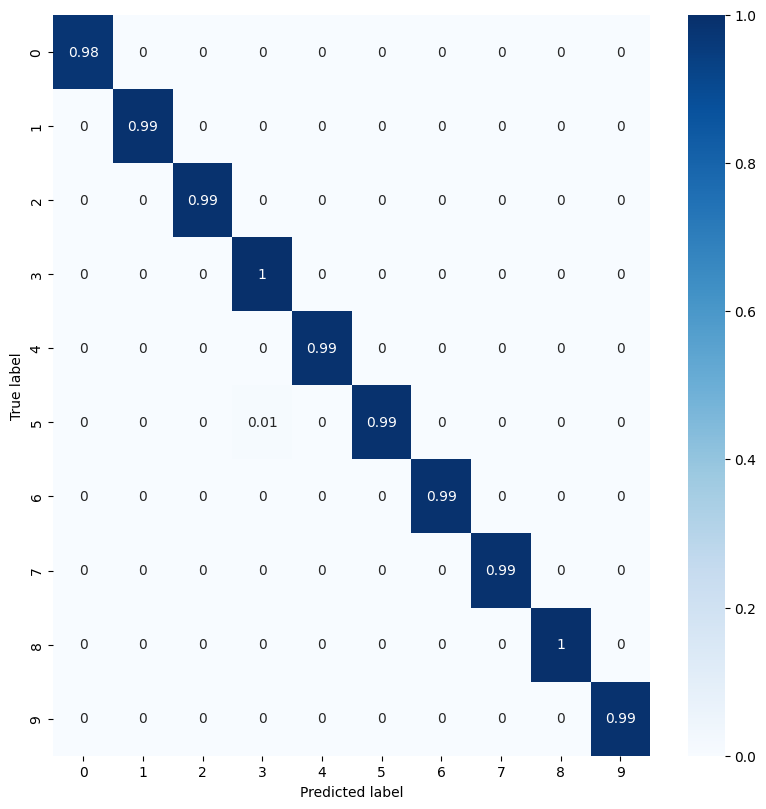

In [11]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes,
                     columns = classes)

figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [97]:
variable_classe = con_mat[7]

# Calculo das variaveis e grafico

vp = variable_classe[7]
fp = variable_classe[8]
fn = variable_classe[0] + variable_classe[1]
vn = variable_classe[3] + variable_classe[4] + variable_classe[5] + variable_classe[6]
n = vp + fp + fn + vn

In [98]:
# (S)ensibilidade: VP / (VP + FN)
s = vp / (vp + vn)

('Sensibilidade da classe 7: ', np.float64(99.9015748031496))

In [99]:
# (E)specificidade: VN / (FP + VN)

e = vn / (fp + vn)

('Especificidade da classe 7: ', np.float64(33.33333333333333))

In [100]:
# (A)curácia: (VP + VN) / N

a = (vp + vn) / n

('Acurácia da classe 5: ', np.float64(99.6078431372549))

In [101]:
# (P)recisao: VP / (VP + FP)
p = vp / (vp + fp)

('Precisão da classe 5: ', np.float64(99.80334316617503))

In [102]:
# F-score: 2 x (P x S) / (P + S)
f_score = 2 * (p * s) / (p + s)

('F-score da classe 5: ', np.float64(99.85243482538122))

In [113]:
print(
    '\nSensibilidade da classe 7: ', s * 100,
    '\nEspecificidade da classe 7: ', e * 100,
    '\nAcurácia da classe 7: ', a * 100,
    '\nPrecisão da classe 7: ', p * 100,
    '\nF-score da classe 7: ', f_score * 100
)


Sensibilidade da classe 7:  99.9015748031496 
Especificidade da classe 7:  33.33333333333333 
Acurácia da classe 7:  99.6078431372549 
Precisão da classe 7:  99.80334316617503 
F-score da classe 7:  99.85243482538122
